In [1]:
import pandas as pd
import numpy as np

data_url = "./data/boston.txt"
data_columns = "CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT".split(" ")
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
df = pd.DataFrame(data, columns=data_columns)
df["MEDV"] = target

FileNotFoundError: [Errno 2] No such file or directory: './data/boston.txt'

In [ ]:
raw_df.shape

(1012, 11)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\sultanov_vz\AppData\Local\Temp\ipykernel_25572\358534029.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MEDV, bins=30)


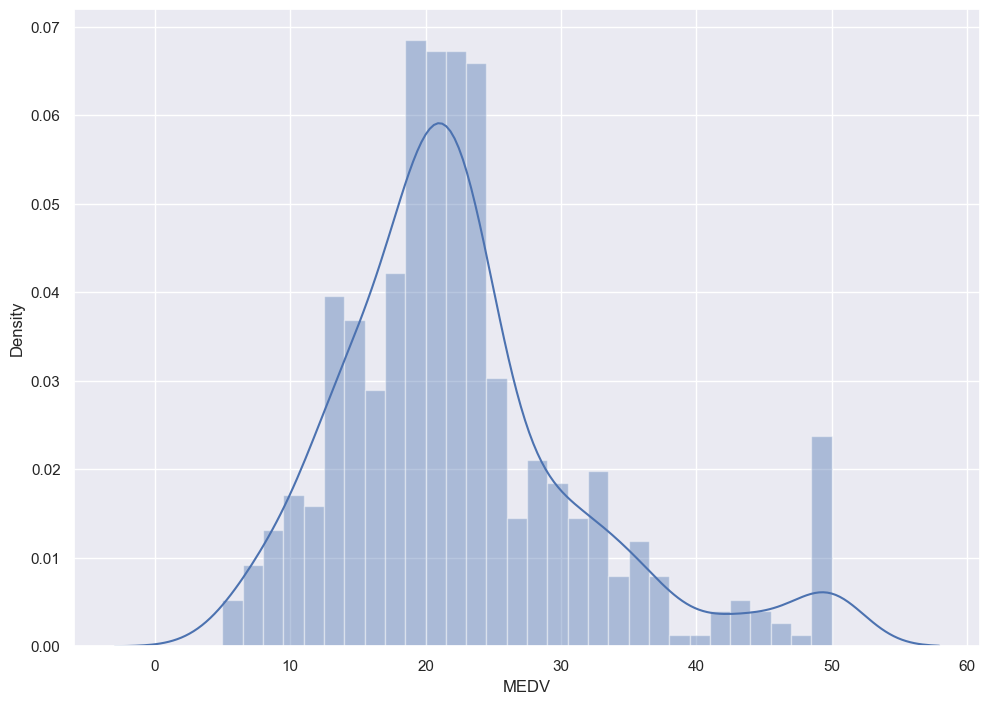

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.distplot(df.MEDV, bins=30)
plt.show()

<AxesSubplot: >

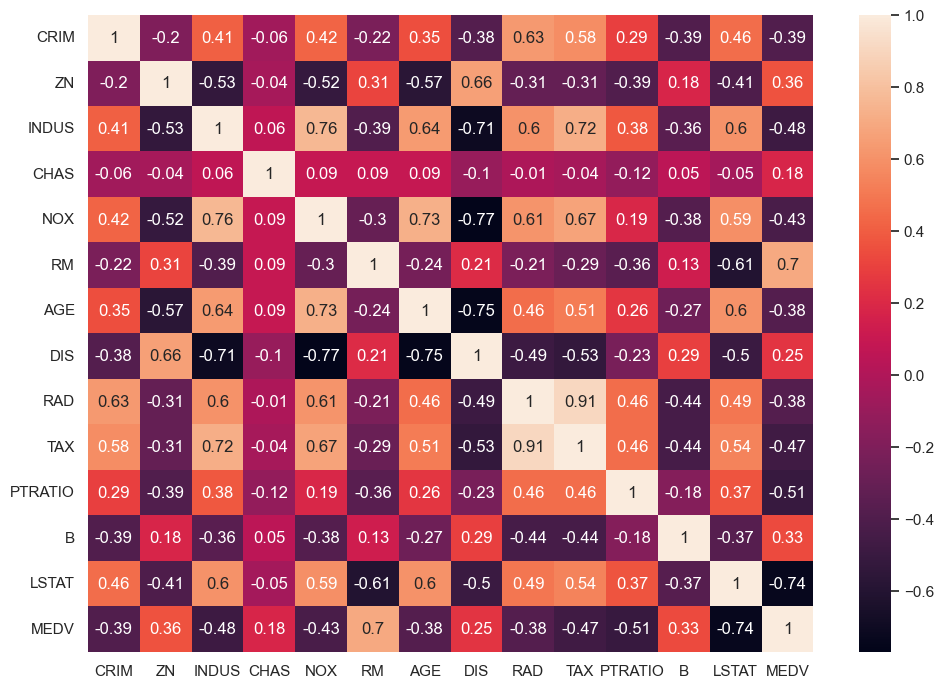

In [ ]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

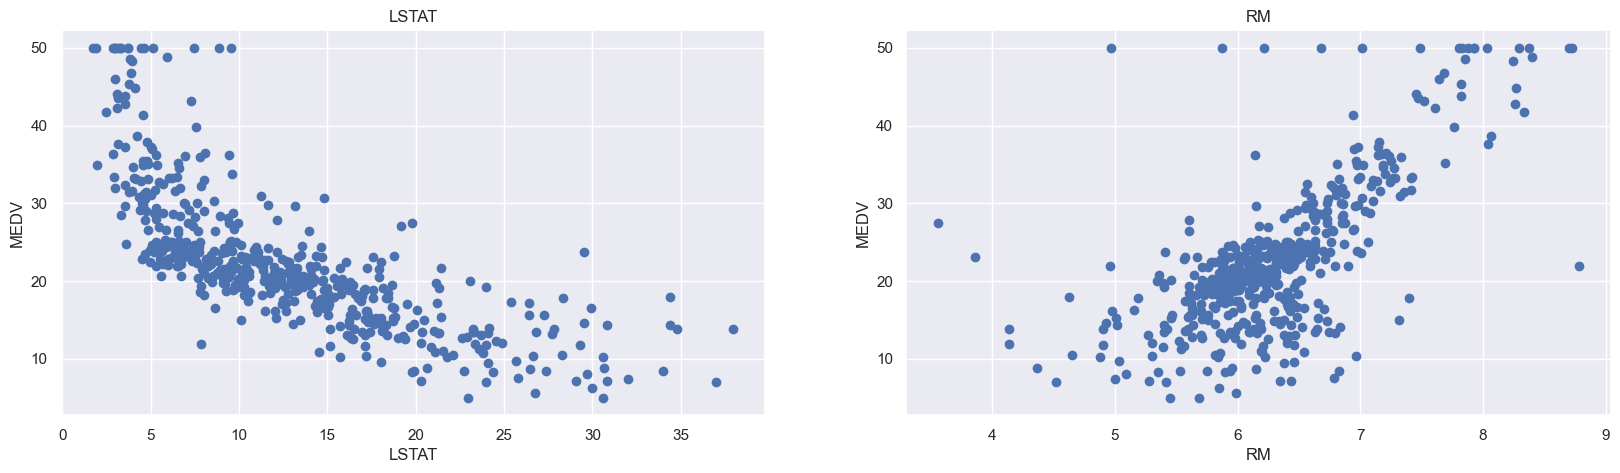

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

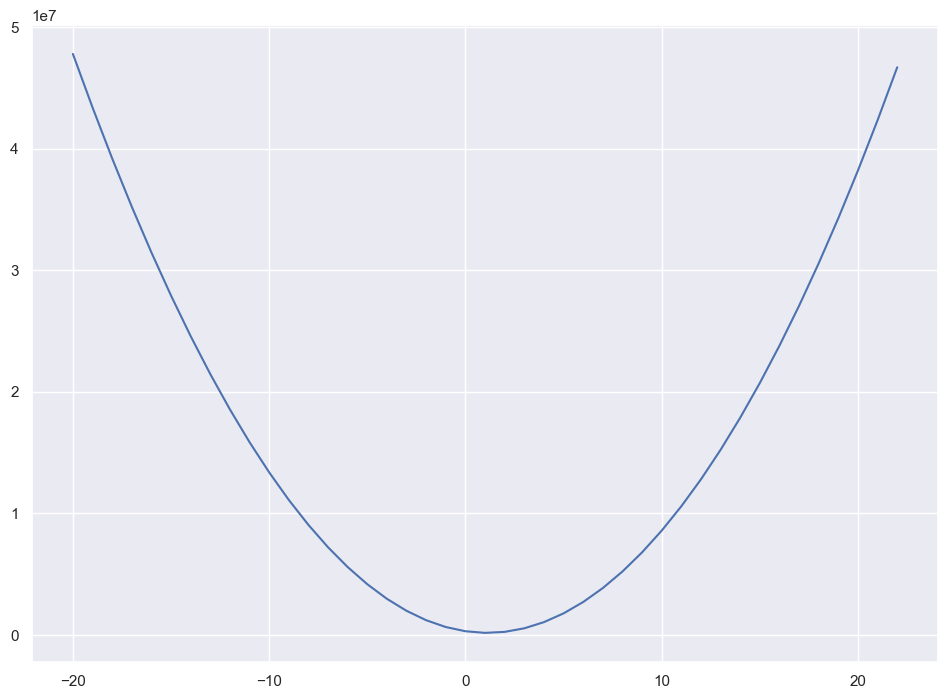

In [ ]:
mses = []
lstat_coef = range(-20, 23)

for coef in lstat_coef:
    pred_values = np.array([coef * lstat for lstat in df.LSTAT.values])
    mses.append(np.sum((target - pred_values)**2))
    
plt.plot(lstat_coef, mses)

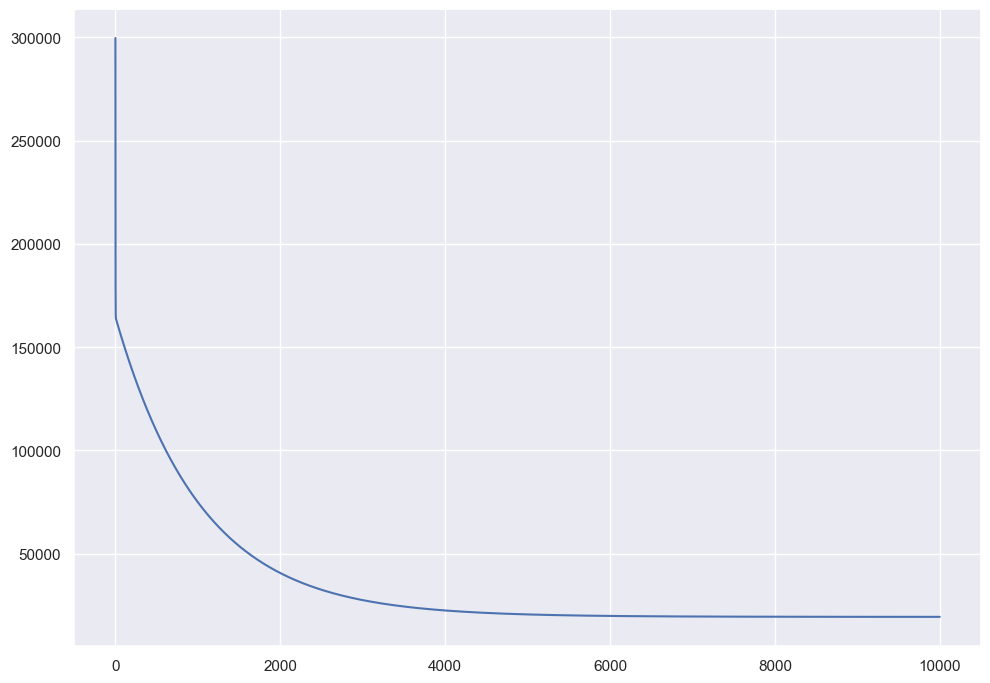

In [ ]:
beta_0 = 0
beta_1 = 0
learning_rate = 0.001
lstat_values = df.LSTAT.values
n = len(lstat_values)
all_mse = []

for _ in range(10000):
    predicted = beta_0 + beta_1 * lstat_values
    residuals = target - predicted
    all_mse.append(np.sum(residuals**2))
    beta_0 = beta_0 - learning_rate * ((2/n) * np.sum(residuals) * -1)
    beta_1 = beta_1 - learning_rate * ((2/n) * residuals.dot(lstat_values) * -1)
    
plt.plot(range(len(all_mse)), all_mse)

Beta 0: 34.27230357706076
Beta 1: -0.9331466362919295


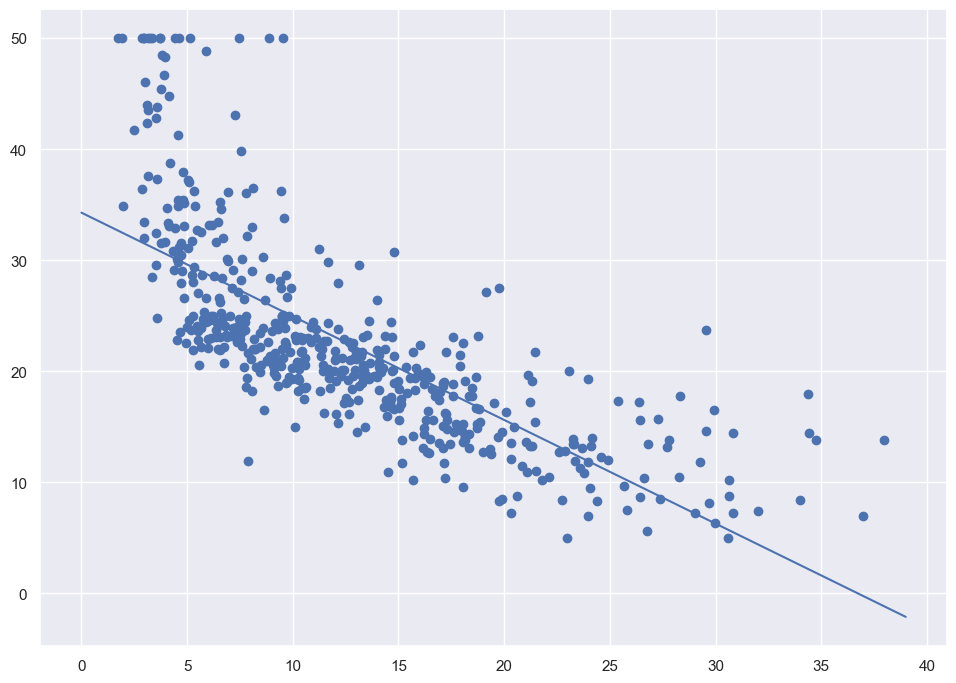

In [ ]:
print(f"Beta 0: {beta_0}")
print(f"Beta 1: {beta_1}")
plt.scatter(df['LSTAT'], target)
x = range(0, 40)
plt.plot(x, [beta_0 + beta_1 * l for l in x])

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

boston_df = df.drop(columns=["MEDV"])
scaler = StandardScaler()
scaler.fit(boston_df) 
scaled_df = scaler.transform(boston_df)

In [ ]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01) 
linear_regression_model.fit(scaled_df, target)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(target, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 4.700835527444994


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False)
poly_df = poly.fit_transform(boston_df) 
scaled_poly_df = scaler.fit_transform(poly_df) 
print(f"shape: {scaled_poly_df.shape}")


linear_regression_model.fit(scaled_poly_df, target)
predictions = linear_regression_model.predict(scaled_poly_df) 
mse = mean_squared_error(target, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

shape: (506, 104)
RMSE: 3.1555646828684663


In [ ]:
linear_regression_model.fit(scaled_df, target) 
sorted(list(zip(boston_df.columns, linear_regression_model.coef_)), 
       key=lambda x: abs(x[1]))

[('INDUS', -0.009887355967721499),
 ('AGE', -0.01169730800703352),
 ('CHAS', 0.6628761506771),
 ('B', 0.8466460823203549),
 ('CRIM', -0.9068746882651851),
 ('ZN', 1.0414934821678616),
 ('TAX', -1.6684252588572557),
 ('NOX', -2.026013829727245),
 ('PTRATIO', -2.042183070930238),
 ('RAD', 2.2825664842912627),
 ('RM', 2.6580094447232883),
 ('DIS', -3.0862703406141008),
 ('LSTAT', -3.703231016756314)]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, 
                                                    target, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [ ]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01) 
linear_regression_model.fit(X_train, y_train)

train_predictions = linear_regression_model.predict(X_train) 
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 23.140302168613267
Test MSE: 21.49970215006185


C:\Users\sultanov_vz\Desktop\ML10\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\sultanov_vz\Desktop\ML10\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\sultanov_vz\Desktop\ML10\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\sultanov_vz\Desktop\ML10\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


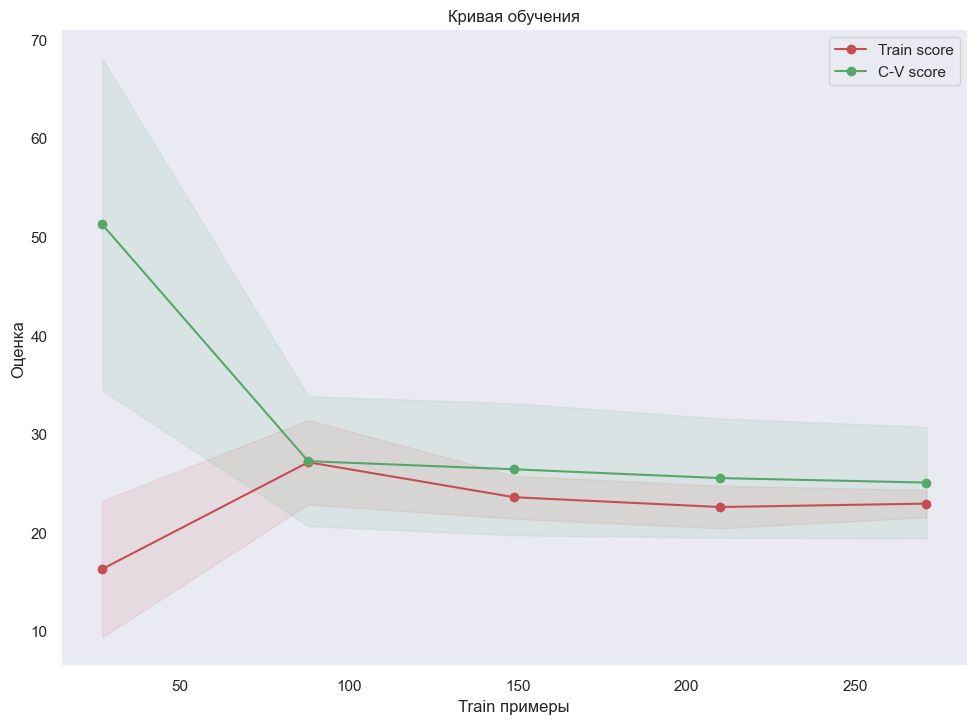

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Train примеры")
    plt.ylabel("Оценка")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="C-V score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(linear_regression_model, 
                    "Кривая обучения", 
                    X_train, 
                    y_train, 
                    cv=5);

In [ ]:
inf = pd.DataFrame({"number_leaks": [6, 6, 7, 7, 4, 8, 7, 6, 1, 6, 3, 4, 4, 6, 9, 11, 6, 3, 9, 6, 7, 8, 6, 6, 9, 7, 0, 6, 6, 2, 9, 6, 1, 3, 6, 6, 6, 3, 10, 8, 8, 3, 4, 4, 11, 9, 3, 5, 3,
                                    3, 3, 2, 4, 7, 4, 3, 6, 6, 8, 1, 4, 8, 0, 3, 1, 1, 4, 3, 3, 2, 10, 12, 7, 5, 6, 7, 9, 10, 9, 7, 10, 7, 7, 9, 9, 6, 5, 8, 0, 9, 7, 12, 10, 4, 7, 8, 9, 8, 8, 0]})

In [ ]:
inf.shape

(100, 1)

In [ ]:
inf.loc[inf.number_leaks == 0]

,number_leaks
26,0
62,0
88,0
99,0


<AxesSubplot: ylabel='Frequency'>

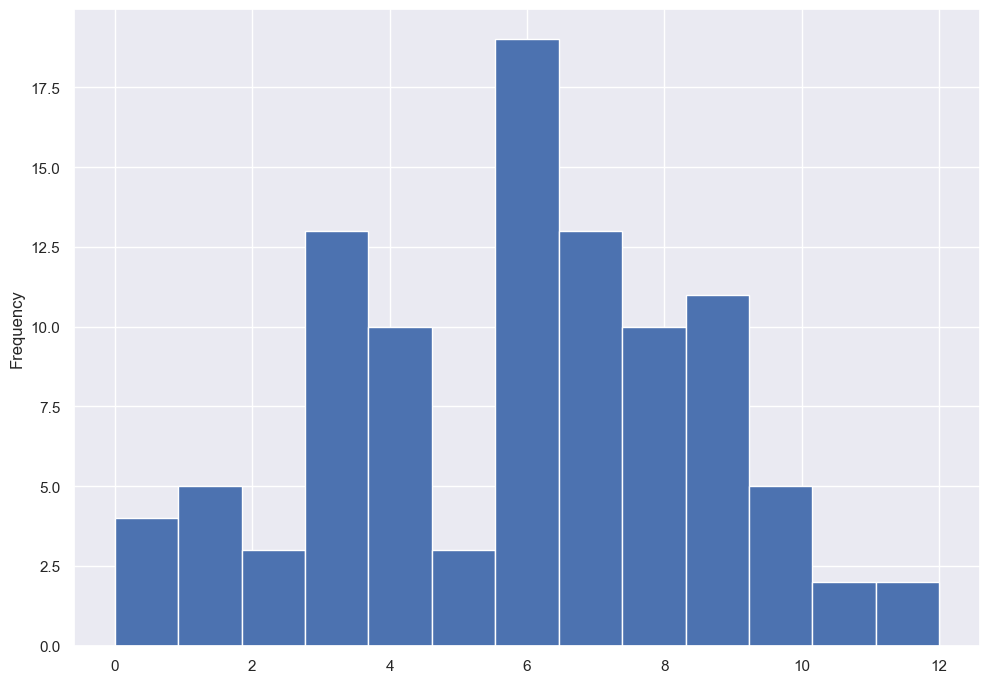

In [ ]:
inf.number_leaks.plot(kind="hist", bins=13)

In [ ]:
import scipy

stat, p = scipy.stats.shapiro(inf.number_leaks) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.970, p-value=0.024
Отклонить гипотезу о нормальности


In [ ]:
stat, p = scipy.stats.normaltest(inf.number_leaks) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=3.190, p-value=0.203
Принять гипотезу о нормальности


<AxesSubplot: >

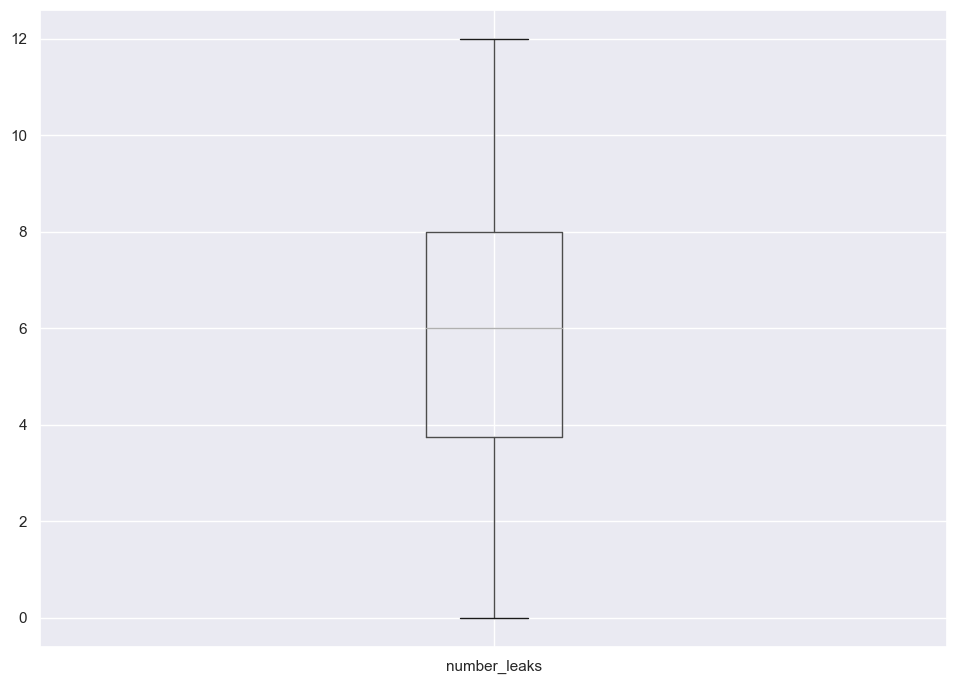

In [ ]:
inf.boxplot("number_leaks")

In [ ]:
inf.number_leaks.std()

2.8933047059050176

In [ ]:
inf.number_leaks.mean()

5.85

In [ ]:
import scipy.stats as stats
stats.zscore(inf.number_leaks)

0     0.052105
1     0.052105
2     0.399472
3     0.399472
4    -0.642628
        ...   
95    0.746838
96    1.094205
97    0.746838
98    0.746838
99   -2.032095
Name: number_leaks, Length: 100, dtype: float64

In [ ]:
f"[{inf.number_leaks.mean() - inf.number_leaks.std()}:{inf.number_leaks.mean() + inf.number_leaks.std()}]"

'[2.956695294094982:8.743304705905018]'

In [ ]:
stats.t.interval(alpha=0.95, df=len(data)-1, loc=inf.number_leaks.mean(), scale=stats.sem(inf.number_leaks)) 

C:\Users\sultanov_vz\AppData\Local\Temp\ipykernel_20088\1377834502.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stats.t.interval(alpha=0.95, df=len(data)-1, loc=inf.number_leaks.mean(), scale=stats.sem(inf.number_leaks))


(5.28156034087719, 6.418439659122809)

In [ ]:
f"[{6.418439659122809 - inf.number_leaks.std()}:{6.418439659122809 + inf.number_leaks.std()}]"

'[3.5251349532177914:9.311744365027828]'